In [1]:
# imports
import numpy as np
import biotite
import biotite.structure as struc
import biotite.structure.io as strucio
import biotite.database.rcsb as rcsb

In [2]:
# get 1qaw protein
pdb_id = "1qaw"
file_name = rcsb.fetch(pdb_id, "mmtf", biotite.temp_dir())

In [53]:
atom_array_gen = strucio.general.load_structure(file_name)

In [56]:
print(atom_array_gen)

    A       5 SER N      N        15.078   58.324   19.377
    A       5 SER CA     C        15.242   57.347   20.453
    A       5 SER C      C        13.965   57.002   21.214
    A       5 SER O      O        13.095   57.880   21.335
    A       5 SER CB     C        16.337   57.838   21.408
    A       5 SER OG     O        16.743   56.801   22.301
    A       6 ASP N      N        13.830   55.847   21.858
    A       6 ASP CA     C        12.583   55.519   22.545
    A       6 ASP C      C        12.217   56.238   23.854
    A       6 ASP O      O        13.030   56.618   24.678
    A       6 ASP CB     C        12.492   54.028   22.890
    A       6 ASP CG     C        11.890   53.297   21.680
    A       6 ASP OD1    O        10.901   53.843   21.157
    A       6 ASP OD2    O        12.504   52.247   21.404
    A       7 PHE N      N        10.905   56.375   24.039
    A       7 PHE CA     C        10.274   56.963   25.186
    A       7 PHE C      C         9.086   56.186   25.7

In [46]:
pdb_id_1 = '1b18'
file_name1 = rcsb.fetch(pdb_id_1, 'mmtf', biotite.temp_dir())
atom_array1 = strucio.load_structure(file_name1)
print(atom_array1.array_length())

472


In [47]:
print(atom_array1)

    A       1 GLY N      N        13.547   46.989   32.052
    A       1 GLY CA     C        13.879   46.022   30.968
    A       1 GLY C      C        15.195   45.317   31.226
    A       1 GLY O      O        15.773   45.443   32.311
    A       2 ILE N      N        15.699   44.624   30.209
    A       2 ILE CA     C        16.942   43.873   30.327
    A       2 ILE C      C        18.185   44.710   30.640
    A       2 ILE O      O        19.069   44.250   31.361
    A       2 ILE CB     C        17.184   42.990   29.081
    A       2 ILE CG1    C        18.287   41.973   29.367
    A       2 ILE CG2    C        17.515   43.852   27.866
    A       2 ILE CD1    C        18.433   40.929   28.288
    A       3 VAL N      N        18.252   45.936   30.129
    A       3 VAL CA     C        19.409   46.785   30.394
    A       3 VAL C      C        19.482   47.158   31.874
    A       3 VAL O      O        20.560   47.181   32.466
    A       3 VAL CB     C        19.396   48.046   29.5

In [49]:
atom_array?

In [3]:
# load_structure
atom_array = strucio.load_structure(file_name)

In [4]:
print(atom_array)
print(atom_array.array_length())

    A       5 SER N      N        15.078   58.324   19.377
    A       5 SER CA     C        15.242   57.347   20.453
    A       5 SER C      C        13.965   57.002   21.214
    A       5 SER O      O        13.095   57.880   21.335
    A       5 SER CB     C        16.337   57.838   21.408
    A       5 SER OG     O        16.743   56.801   22.301
    A       6 ASP N      N        13.830   55.847   21.858
    A       6 ASP CA     C        12.583   55.519   22.545
    A       6 ASP C      C        12.217   56.238   23.854
    A       6 ASP O      O        13.030   56.618   24.678
    A       6 ASP CB     C        12.492   54.028   22.890
    A       6 ASP CG     C        11.890   53.297   21.680
    A       6 ASP OD1    O        10.901   53.843   21.157
    A       6 ASP OD2    O        12.504   52.247   21.404
    A       7 PHE N      N        10.905   56.375   24.039
    A       7 PHE CA     C        10.274   56.963   25.186
    A       7 PHE C      C         9.086   56.186   25.7

In [5]:
for cat in atom_array.get_annotation_categories():
    print(cat, atom_array.get_annotation(cat), len(atom_array.get_annotation(cat)))

chain_id ['A' 'A' 'A' ... 'K' 'K' 'K'] 6222
res_id [ 5  5  5 ... -1 -1 -1] 6222
res_name ['SER' 'SER' 'SER' ... 'HOH' 'HOH' 'HOH'] 6222
hetero [False False False ...  True  True  True] 6222
atom_name ['N' 'CA' 'C' ... 'O' 'O' 'O'] 6222
element ['N' 'C' 'C' ... 'O' 'O' 'O'] 6222


In [58]:
atom_array.

TypeError: 'NoneType' object is not iterable

In [6]:
# Remove all non-amino acids
atom_array = atom_array[struc.filter_amino_acids(atom_array)]

In [7]:
atom_array.array_length()

5827

In [8]:
# coord is a NumPy array
coord = atom_array.coord

In [9]:
print(type(coord))
print('Length', len(coord))
print(coord)

<class 'numpy.ndarray'>
Length 5827
[[15.078 58.324 19.377]
 [15.242 57.347 20.453]
 [13.965 57.002 21.214]
 ...
 [-5.491 68.95  37.308]
 [-6.256 68.637 38.589]
 [-6.58  67.474 38.845]]


In [38]:
np.amin(coord, axis=0)

array([-13.638,   9.438, -34.545], dtype=float32)

In [40]:
np.amax(coord, axis=0)

array([38.46 , 92.426, 47.49 ], dtype=float32)

In [41]:
np.amax(coord, axis=0) - np.amin(coord, axis=0)

array([52.098  , 82.98801, 82.035  ], dtype=float32)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

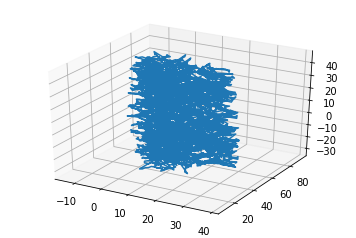

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(coord[:,0],coord[:,1],coord[:,2])
plt.show()

In [44]:
# Calculate all pairwise difference vectors
diff = coord[:, np.newaxis, :] - coord[np.newaxis, :, :]

In [48]:
diff

array([[[  0.        ,   0.        ,   0.        ],
        [ -0.16399956,   0.9770012 ,  -1.0759983 ],
        [  1.1129999 ,   1.3220024 ,  -1.8369999 ],
        ...,
        [ 20.569     , -10.625996  , -17.930998  ],
        [ 21.334     , -10.313     , -19.212     ],
        [ 21.658     ,  -9.149998  , -19.468     ]],

       [[  0.16399956,  -0.9770012 ,   1.0759983 ],
        [  0.        ,   0.        ,   0.        ],
        [  1.2769995 ,   0.34500122,  -0.7610016 ],
        ...,
        [ 20.733     , -11.602997  , -16.855     ],
        [ 21.498     , -11.290001  , -18.136002  ],
        [ 21.821999  , -10.126999  , -18.392002  ]],

       [[ -1.1129999 ,  -1.3220024 ,   1.8369999 ],
        [ -1.2769995 ,  -0.34500122,   0.7610016 ],
        [  0.        ,   0.        ,   0.        ],
        ...,
        [ 19.456001  , -11.947998  , -16.093998  ],
        [ 20.221     , -11.635002  , -17.375     ],
        [ 20.545     , -10.472     , -17.631     ]],

       ...,

      

In [49]:
# Calculate absolute of difference vectors -> square distances
sq_dist = np.sum(diff*diff, axis=-1)

In [50]:
sq_dist

array([[  0.       ,   2.1391995,   6.3610277, ..., 857.51624  ,
        930.59845  , 931.7945   ],
       [  2.1391995,   0.       ,   2.328877 , ..., 848.5778   ,
        918.54266  , 917.0215   ],
       [  6.3610277,   2.328877 ,   0.       , ..., 780.30743  ,
        846.1528   , 842.612    ],
       ...,
       [857.51624  , 848.5778   , 780.30743  , ...,   0.       ,
          2.3241575,   5.726867 ],
       [930.59845  , 918.54266  , 846.1528   , ...,   2.3241575,
          0.       ,   1.5230858],
       [931.7945   , 917.0215   , 842.612    , ...,   5.726867 ,
          1.5230858,   0.       ]], dtype=float32)

In [51]:
indices = np.unravel_index(np.argmax(sq_dist), sq_dist.shape)

In [52]:
indices

(1067, 3966)

In [53]:
diameter = np.sqrt(np.max(sq_dist))

In [54]:
diameter

88.78395